## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [22]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd

In [23]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


### Load ssd_reviews.csv file

In [24]:
df1 = pd.read_csv('ssd_reviews.csv')
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.drop(columns='Unnamed: 0', axis=1, inplace=True)

There are 2227 rows and 11 columns


Let's take a quick look at what the data looks like:

In [25]:
df1.head()

,review_title,overall_review,pros,cons,ownership_pariod,date,rating_stars,year,month,day
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN,years,2019-12-05 12:58:58,5,2019,12,5
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN,years,2019-11-01 08:25:45,5,2019,11,1
2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far,years,2019-10-27 17:05:49,5,2019,10,27
3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...,years,2019-10-24 18:29:43,5,2019,10,24
4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN,years,2019-09-11 19:21:03,5,2019,9,11


## Exploratory analysis

Distribution graphs (histogram/bar graph) of sampled columns:

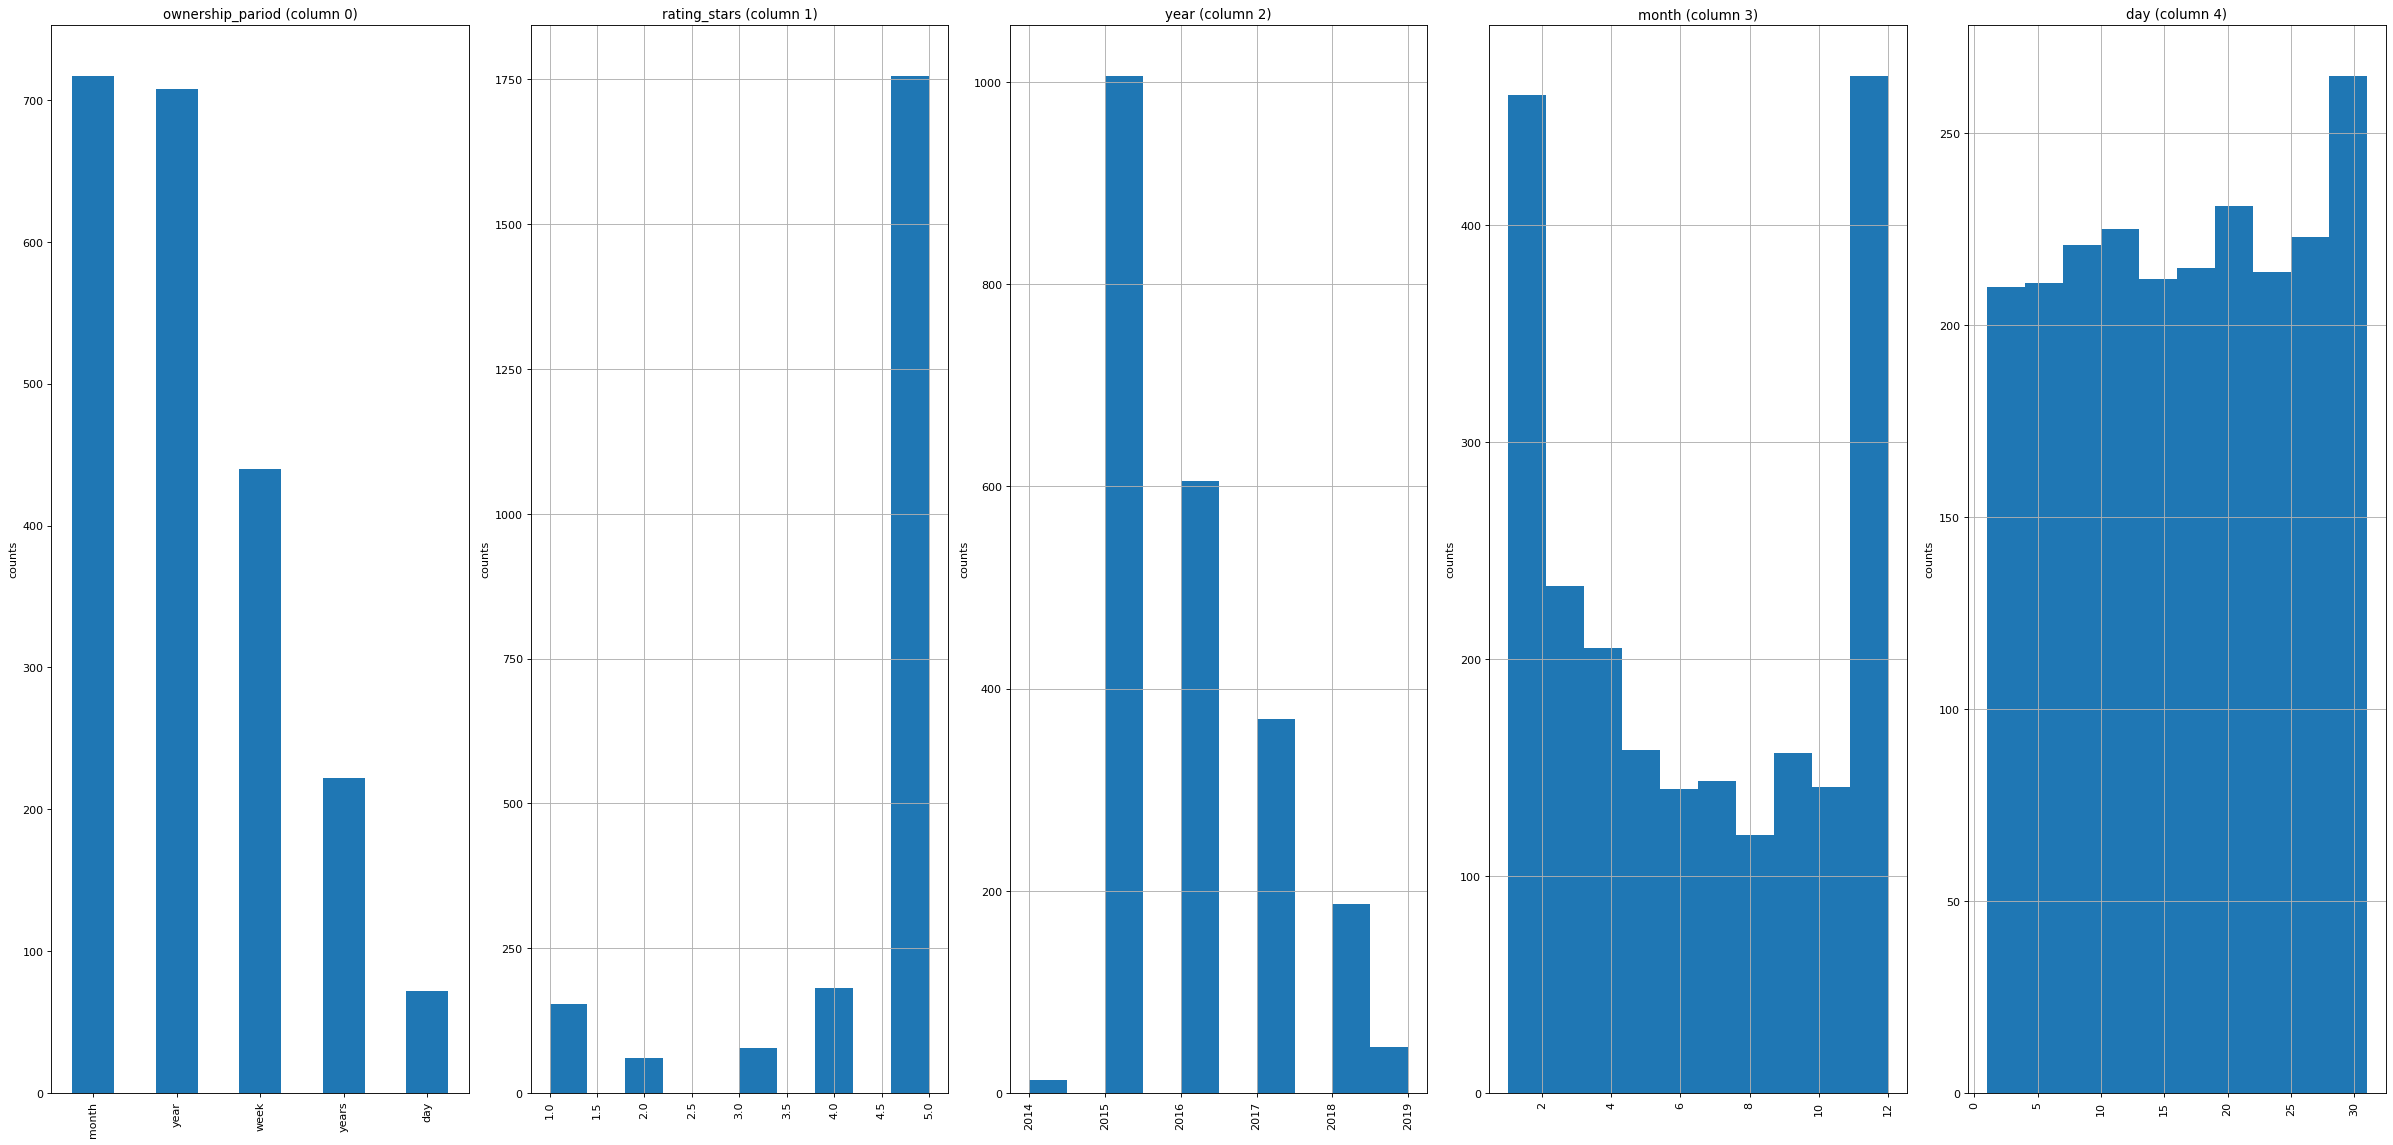

In [26]:
plotPerColumnDistribution(df1, 10, 5)

In [29]:
df1['ownership_pariod'].value_counts()   #Look at data_description.txt file for more information

month    717
year     708
week     440
years    222
day       72
Name: ownership_pariod, dtype: int64

In [30]:
df1['rating_stars'].value_counts()   #Look at data_description.txt file for more information

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

In [31]:
df1['year'].value_counts()   #Look at data_description.txt file for more information

2015    1006
2016     605
2017     370
2018     187
2019      46
2014      13
Name: year, dtype: int64

In [34]:
df1['month'].value_counts()   #Look at data_description.txt file for more information

12    278
2     239
3     234
1     221
4     205
11    191
5     158
9     157
7     144
10    141
6     140
8     119
Name: month, dtype: int64

In [35]:
df1['day'].value_counts()   #Look at data_description.txt file for more information

27    88
4     88
12    88
3     87
10    84
20    84
13    84
8     82
29    80
21    77
26    77
30    76
16    75
7     75
23    75
15    71
17    71
28    70
24    70
19    70
22    69
18    69
6     65
1     65
9     64
2     58
5     58
25    58
14    57
11    53
31    39
Name: day, dtype: int64

# Suggestions :

<b> Suggestions for modeling: <br>
create two additional columns, the first one contains both (pros and cons) in the same column, and the second column contains (0 and 1), So if the value in the new column (pros and cons) is pros then put 1, And if the value is cons then put 0 </b>

<b> Since we have pros and cons data, we don't need to add more products to the dataset, Because when we want to do a Sentiment analysis, the pros and cons will be in the same column, So the Sentiment analysis training will consider cons as negative and pros as positive, And from that our model will be balanced.</b>

#### Enjoy modeling ..